We consider the ``derivative of the loss'' term that appears in the diversity objective and which we propose can be neglected. We show here that by minimizing the loss using the training set we are also biasing the derivative of the loss both for the training set but also implicitly for the testing and validation sets.

Text(0.5, 16.422671235579244, '$f$')

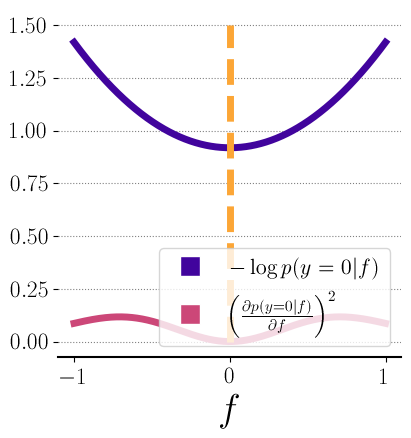

In [10]:
import numpy as np

def nll_gaussian(x):
    y = (1/np.sqrt(2*np.pi)*np.exp(-x**2/2))
    y = -np.log(y)
    return y

def gaussian_derivative_squared(x):
    y = (1/np.pi)*(2*np.exp(-2*x**2)*x**2)
    return y


x = np.linspace(-1,1,1000)

from matplotlib import pyplot as plt
from matplotlib.lines import Line2D

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
f, axs = plt.subplots(1, 1, figsize=(4, 4))

size_font_title = 28
size_font_legend = 16
size_font_axis = 20
tick_size = 17  # 17
border_linewidth = 1.5

cmap = plt.colormaps["plasma"]
patches = []

axs.plot(x, nll_gaussian(x), linewidth=5, c=cmap(0.1), linestyle='-')
axs.plot(x, gaussian_derivative_squared(x), linewidth=5, c=cmap(0.5), linestyle='-')
axs.vlines(0, 0, 1.5, linewidth=5, colors=cmap(0.8), linestyle='--')

patches.append(Line2D([0], [0], marker='s', color='w', label=r'$-\log p(y=0\vert f)$',
                 markerfacecolor=cmap(0.1), markersize=15))
patches.append(Line2D([0], [0], marker='s', color='w', label=r'$\left(  \frac{\partial p(y=0\vert f)}{\partial f} \right)^2$',
                 markerfacecolor=cmap(0.5), markersize=15))


# Figure formating
axs.grid(linestyle=':', color='grey', axis='y')
[i.set_linewidth(border_linewidth) for i in axs.spines.values()]
plt.tight_layout()
#plt.ylim(-10, 5)

axs.tick_params(axis='both', which='major', labelsize=tick_size)

axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
axs.spines['left'].set_visible(False)

cmap = plt.colormaps["plasma"]

axs.legend(loc=4, handles=patches, fontsize=size_font_legend)
plt.xlabel(r'$f$', fontsize=size_font_title)
#plt.ylabel(r'$-\frac{\partial}{\partial w} \left[ \boldsymbol{-\mathrm{V}}(\hat{\rho}) \right]$', fontsize=size_font_title)
#plt.title(r'$\frac{\partial f(x_t;w)}{\partial w}=+4$', fontsize=size_font_title)